# 로지스틱 회귀
- 분류문제
- 이진 분류 문제

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

plt.rcParams['figure.figsize'] = [10, 8]

sns.set(style='whitegrid')
sns.set_palette('pastel')

# Ignore warnings
warnings.filterwarnings('ignore')

# Handle Korean font issues
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    # Windows
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    # Mac
    rc('font', family='AppleGothic')

# Handle minus sign display for Unicode
plt.rcParams['axes.unicode_minus'] = False
data = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv')

data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...
884,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
885,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
886,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
887,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [71]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [72]:
numeric_data = data.select_dtypes(include='number')
numeric_data.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


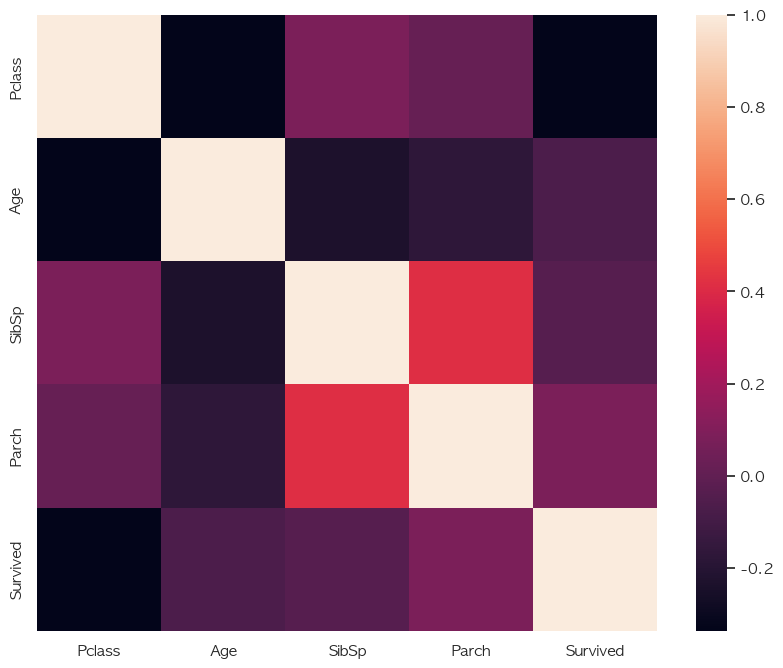

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(numeric_data.corr())
plt.show()

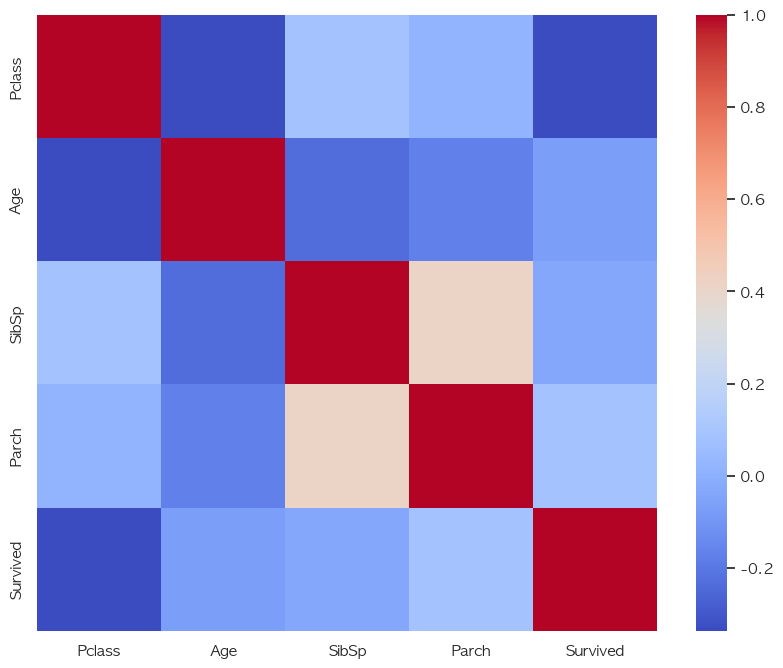

In [78]:
sns.heatmap(numeric_data.corr() ,cmap='coolwarm')
plt.show()

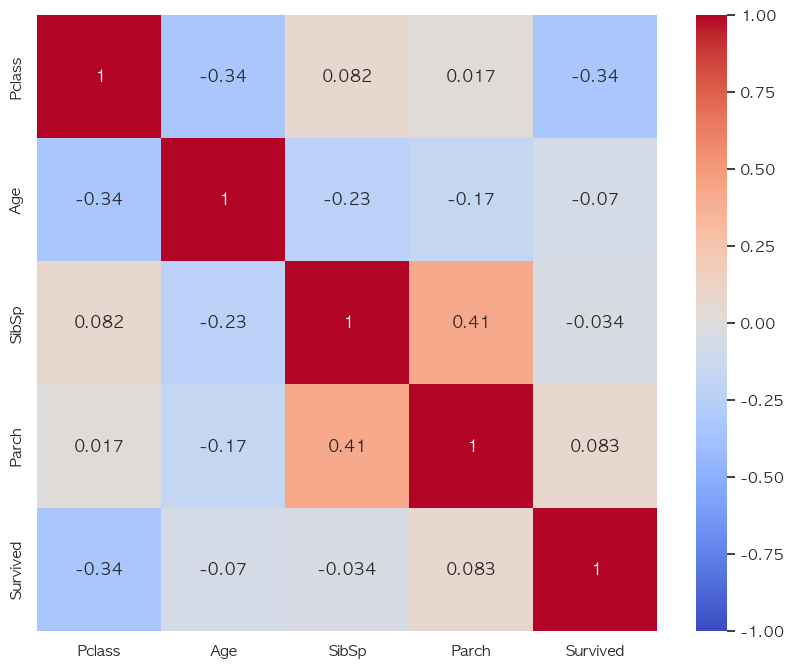

In [81]:
sns.heatmap(numeric_data.corr() ,cmap='coolwarm',vmin=-1,vmax=1,annot=True)
plt.show()

# 원-핫 인코딩
- 범주형태의변수를 숫자로 표현하는방법,고윳값에 대한 새로운 변수들을 만들어 0과 1로 표현


In [82]:
data['Name'].nunique()

889

In [84]:
data['Sex'].nunique()

2

In [85]:
data= data.drop(['Name','Ticket'],axis=1)

In [86]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [95]:
data=pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)


In [96]:
from sklearn.model_selection import train_test_split

x = data.drop('Survived',axis=1)
y= data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
pred= model.predict(x_test)

In [97]:
# 이진분류에는 RMSE대신 accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


0.7808988764044944

# Feature Engineering
- PCA :독립변수의 개수를 줄이는 방법

In [98]:
data['family'] = data['SibSp']+data['Parch']
data.drop(['SibSp','Parch'],axis=1,inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0


In [100]:
x= data.drop('Survived',axis=1)
y= data['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)
model = LogisticRegression()
model.fit(x_train,y_train)
pred= model.predict(x_test)
accuracy_score(y_test,pred)
#총 독립변수가 줄어들지만 기존보다 정확도가 0.012 상승

0.7921348314606742

In [102]:
import polars as pl
data.corr()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
Pclass,1.000000,-0.336512,-0.335549,0.127741,0.220558,0.076466,0.064221
Age,-0.336512,1.000000,-0.069822,0.086506,-0.030436,-0.008964,-0.244631
Survived,-0.335549,-0.069822,1.000000,-0.541585,0.004536,-0.151777,0.018277
Sex_male,0.127741,0.086506,-0.541585,1.000000,-0.075217,0.121405,-0.203191
Embarked_Q,0.220558,-0.030436,0.004536,-0.075217,1.000000,-0.499261,-0.059007
Embarked_S,0.076466,-0.008964,-0.151777,0.121405,-0.499261,1.000000,0.078197
family,0.064221,-0.244631,0.018277,-0.203191,-0.059007,0.078197,1.000000
